<a href="https://colab.research.google.com/github/pranavi2013/DA-Python/blob/main/FRUITS%26VEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("youssefsalahzakria/fruit-and-vegetables-classification")

print("Path to dataset files:", path)

100%|██████████| 4.82G/4.82G [00:58<00:00, 89.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/youssefsalahzakria/fruit-and-vegetables-classification/versions/5


In [ ]:
import os
dataset_path = "/root/.cache/kagglehub/datasets/youssefsalahzakria/fruit-and-vegetables-classification/versions/5/train"

In [ ]:
categories = sorted(os.listdir(dataset_path))

category_counts = {}
for category in categories:
    category_path = os.path.join(dataset_path, category)
    num_images = len(os.listdir(category_path))
    category_counts[category] = num_images
print("Number of images in each category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Number of images in each category:
Apple: 1321
Avocado: 1041
Banana: 1866
Beetroot: 224
Blackberry: 891
Blueberry: 669
Broccoli: 1473
Cabbage: 192
Capsicum: 960
Carrot: 836
Cauliflower: 1229
Chilli Peper: 400
Corn: 1284
Cucumber: 1442
Dates: 422
Dragonfruit: 951
Eggplant: 835
Fig: 802
Garlic: 498
Ginger: 753
Grapes: 1740
Guava: 667
Jalepeno: 133
Kiwi: 1152
Lemon: 1284
Lettuce: 291
Mango: 1380
Mushroom: 353
Okra: 416
Olive: 598
Onion: 1216
Orange: 2697
Paprika: 83
Peanuts: 441
Pear: 1114
Peas: 1470
Pineapple: 1668
Pomegranate: 2344
Potato: 477
Pumpkin: 210
Raddish: 795
Rambutan: 747
Soy Beans: 852
Spinach: 841
Strawberry: 1479
Sweetcorn: 183
Sweetpotato: 1084
Tomato: 723
Turnip: 240
Watermelon: 1424


In [ ]:
import random
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
output_path = "/root/.cache/kagglehub/datasets/augmented_dataset"

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

if not os.path.exists(output_path):
    os.makedirs(output_path)

for category in sorted(os.listdir(dataset_path)):
    category_path = os.path.join(dataset_path, category)
    output_category_path = os.path.join(output_path, category)
    os.makedirs(output_category_path, exist_ok=True)

    image_files = os.listdir(category_path)
    for img_file in image_files:
        shutil.copy(os.path.join(category_path, img_file), output_category_path)

    num_images = len(image_files)

    if num_images > 500:
        excess_images = num_images - 500
        print(f"Removing {excess_images} images from {category}...")
        images_to_remove = random.sample(image_files, excess_images)

        for img in images_to_remove:
            os.remove(os.path.join(output_category_path, img))

    elif num_images < 500:
        images_to_generate = 500 - num_images
        print(f"Augmenting {category}: Generating {images_to_generate} new images...")

        img_files = os.listdir(output_category_path)
        for img_file in img_files:
            if images_to_generate <= 0:
                break
            img_path = os.path.join(output_category_path, img_file)
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_category_path,
                                      save_prefix=category, save_format="jpg"):
                i += 1
                images_to_generate -= 1
                if images_to_generate <= 0:
                    break
category_counts = {cat: len(os.listdir(os.path.join(output_path, cat))) for cat in sorted(os.listdir(output_path))}
print("Final image count per category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Removing 821 images from Apple...
Removing 541 images from Avocado...
Removing 1366 images from Banana...
Augmenting Beetroot: Generating 276 new images...
Removing 391 images from Blackberry...
Removing 169 images from Blueberry...
Removing 973 images from Broccoli...
Augmenting Cabbage: Generating 308 new images...
Removing 460 images from Capsicum...
Removing 336 images from Carrot...
Removing 729 images from Cauliflower...
Augmenting Chilli Peper: Generating 100 new images...
Removing 784 images from Corn...
Removing 942 images from Cucumber...
Augmenting Dates: Generating 78 new images...
Removing 451 images from Dragonfruit...
Removing 335 images from Eggplant...
Removing 302 images from Fig...
Augmenting Garlic: Generating 2 new images...
Removing 253 images from Ginger...
Removing 1240 images from Grapes...
Removing 167 images from Guava...
Augmenting Jalepeno: Generating 367 new images...
Removing 652 images from Kiwi...
Removing 784 images from Lemon...
Augmenting Lettuce: Ge

In [ ]:
category_counts = {cat: len(os.listdir(os.path.join(output_path, cat))) for cat in sorted(os.listdir(output_path))}

for category, count in category_counts.items():
    print(f"{category}: {count}")


Apple: 500
Avocado: 500
Banana: 500
Beetroot: 497
Blackberry: 500
Blueberry: 500
Broccoli: 500
Cabbage: 497
Capsicum: 500
Carrot: 500
Cauliflower: 500
Chilli Peper: 500
Corn: 500
Cucumber: 500
Dates: 500
Dragonfruit: 500
Eggplant: 500
Fig: 500
Garlic: 500
Ginger: 500
Grapes: 500
Guava: 500
Jalepeno: 491
Kiwi: 500
Lemon: 500
Lettuce: 500
Mango: 500
Mushroom: 500
Okra: 499
Olive: 500
Onion: 500
Orange: 500
Paprika: 492
Peanuts: 500
Pear: 500
Peas: 500
Pineapple: 500
Pomegranate: 500
Potato: 500
Pumpkin: 496
Raddish: 500
Rambutan: 500
Soy Beans: 500
Spinach: 500
Strawberry: 500
Sweetcorn: 498
Sweetpotato: 500
Tomato: 500
Turnip: 497
Watermelon: 500


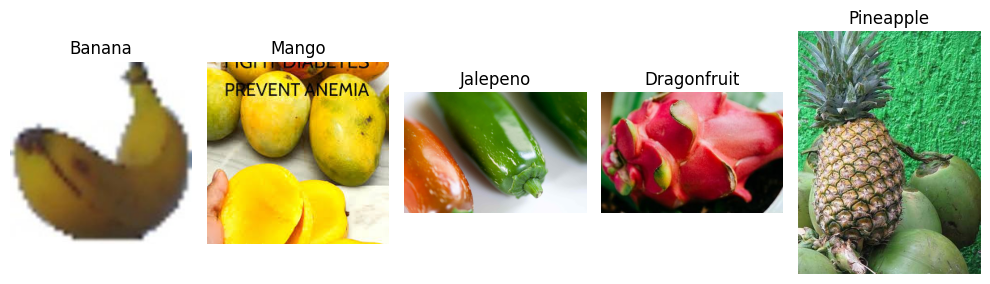

In [ ]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img

categories = sorted(os.listdir(output_path))

random_categories = random.sample(categories, min(5, len(categories)))
plt.figure(figsize=(10, 10))

for i, category in enumerate(random_categories):
    category_path = os.path.join(output_path, category)
    images = os.listdir(category_path)

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(category_path, random_image)
        img = load_img(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")

plt.tight_layout()
plt.show()


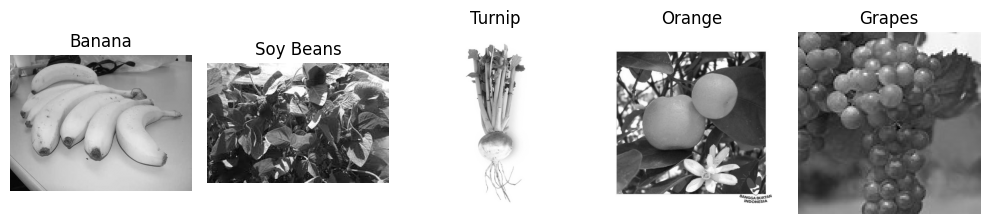

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

random_categories = random.sample(categories, min(5, len(categories)))
plt.figure(figsize=(10, 10))

for i, category in enumerate(random_categories):
    category_path = os.path.join(output_path, category)
    images = os.listdir(category_path)

    if images:
        random_image = random.choice(images)
        img_path = os.path.join(category_path, random_image)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(category)
        plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
train_data_dir = "/root/.cache/kagglehub/datasets/augmented_dataset"
img_size = (150, 150)
batch_size = 32
epochs = 10


In [ ]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)

Found 19975 images belonging to 50 classes.
Found 4990 images belonging to 50 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 51/625 ━━━━━━━━━━━━━━━━━━━━ 1:32 160ms/step - accuracy: 0.0175 - loss: 4.1070

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 188ms/step - accuracy: 0.0777 - loss: 3.5989 - val_accuracy: 0.3389 - val_loss: 2.4747
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.2783 - loss: 2.6095 - val_accuracy: 0.4010 - val_loss: 2.1382
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - accuracy: 0.3612 - loss: 2.2638 - val_accuracy: 0.4305 - val_loss: 2.0417
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.4308 - loss: 2.0014 - val_accuracy: 0.4898 - val_loss: 1.9027
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.5006 - loss: 1.7291 - val_accuracy: 0.5200 - val_loss: 1.7965
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.5705 - loss: 1.4507 - val_accuracy: 0.5072 - val_loss: 1.8499
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.6318 - loss: 1.2286 - val_accuracy: 0.5242 - val_loss: 1.8153
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.6821 - loss: 1.0415 - 

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 19975 images belonging to 50 classes.
Found 4990 images belonging to 50 classes.


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 204ms/step - accuracy: 0.0730 - loss: 3.8215 - val_accuracy: 0.2868 - val_loss: 2.7221
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.2770 - loss: 2.6646 - val_accuracy: 0.4226 - val_loss: 2.1663
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.4204 - loss: 2.0913 - val_accuracy: 0.4727 - val_loss: 1.9574
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 181ms/step - accuracy: 0.5576 - loss: 1.5454 - val_accuracy: 0.4902 - val_loss: 1.9372
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - accuracy: 0.6712 - loss: 1.1435 - val_accuracy: 0.5152 - val_loss: 1.9780
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.7576 - loss: 0.8194 - val_accuracy: 0.5012 - val_loss: 2.2568
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 198ms/step - accuracy: 0.8050 - loss: 0.6487 - val_accuracy: 0.5156 - val_loss: 2.4533
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 193ms/step - accuracy: 0.8429 -

In [ ]:
model.save("model.h5")

Saving c.jpg to c (3).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
c (3).jpg


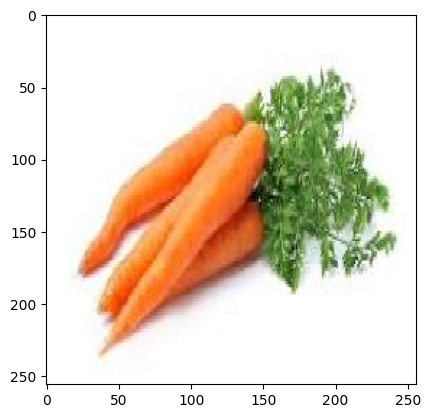

Predicted Class: Carrot


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

model = tf.keras.models.load_model("model.h5")

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  plt.imshow(img)
  plt.show()

  predicted_class_index = np.argmax(classes[0])

  class_indices = {v: k for k, v in train_generator.class_indices.items()}
  predicted_class_name = class_indices.get(predicted_class_index, "Unknown")

  print("Predicted Class:", predicted_class_name)


In [ ]:
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']
epochs = len(train_accuracies)
train_accuracies = np.array(train_accuracies)
val_accuracies = np.array(val_accuracies)
if epochs > 30:
    test_type = "Z-Test (using t-test approximation)"
else:
    test_type = "T-Test"

t_stat, p_val = stats.ttest_ind(train_accuracies, val_accuracies)

print(f"{test_type} p-value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Accept the null hypothesis: No significant difference.")

val_losses = np.array(history.history['val_loss'])
f_stat, anova_p = stats.f_oneway(train_accuracies, val_accuracies, val_losses)

print(f"\nANOVA Test p-value: {anova_p}")
if anova_p < 0.05:
    print("Reject the null hypothesis: At least one metric differs significantly.")
else:
    print(" Accept the null hypothesis: No significant difference among metrics.")


T-Test p-value: 0.09627539170540811
Accept the null hypothesis: No significant difference.

ANOVA Test p-value: 1.3228440457115263e-16
Reject the null hypothesis: At least one metric differs significantly.


In [ ]:
import numpy as np
from scipy.stats import norm

train_accuracies = np.array(history.history['accuracy'])
val_accuracies = np.array(history.history['val_accuracy'])

mean_train = np.mean(train_accuracies)
mean_val = np.mean(val_accuracies)

std_train = np.std(train_accuracies, ddof=1)
std_val = np.std(val_accuracies, ddof=1)

n_train = len(train_accuracies)
n_val = len(val_accuracies)

z_score = (mean_train - mean_val) / np.sqrt((std_train**2 / n_train) + (std_val**2 / n_val))

p_value = 2 * (1 - norm.cdf(abs(z_score)))

print("Z-Statistic:", z_score)
print("Z-Test p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between train and val accuracy.")
else:
    print("Accept the null hypothesis: No significant difference between train and val accuracy.")


Z-Statistic: 1.7549394844635429
Z-Test p-value: 0.0792696594438973
Accept the null hypothesis: No significant difference between train and val accuracy.


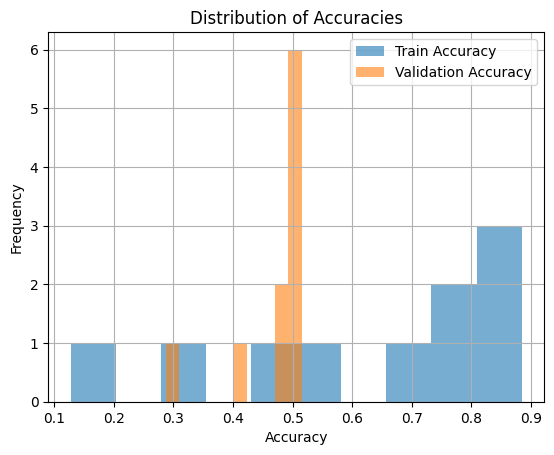

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_accuracies, bins=10, alpha=0.6, label='Train Accuracy')
plt.hist(val_accuracies, bins=10, alpha=0.6, label='Validation Accuracy')
plt.legend()
plt.title("Distribution of Accuracies")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
